In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [42]:
#Data frame attributes
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [43]:
#drop duplicate column(temp c) and 
data1  = data.drop(['Unnamed: 0', "Temp C"] , axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [44]:
data1['Month'] = pd.to_numeric(data['Month'],errors = 'coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [45]:
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [46]:
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [47]:
#drop duplicated rows
data1.drop_duplicates(keep = 'first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [60]:
#renaming th columns
data1.rename({'Solar.R':'Solar'},axis = 1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,199.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     157 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [62]:
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

<AxesSubplot:>

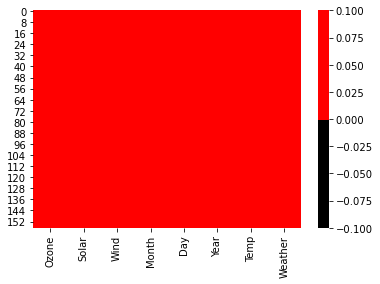

In [63]:
#visualize data1 missing values using raph

cols = data1.columns
colors = ['black','red']
sns.heatmap(data1[cols].isnull(),cmap = sns.color_palette(colors),cbar = True)

In [64]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of ozone:  31.0
Mean of Ozone:  39.197452229299365


In [65]:
data1['Ozone']= data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [66]:
median_ozone = data1["Solar"].median()
mean_ozone = data1["Solar"].mean()
print("Median of Soalr: ", median_ozone)
print("Mean of Solar: ", mean_ozone)

Median of Soalr:  199.0
Mean of Solar:  185.97452229299364


In [67]:
data1['Solar']= data1['Solar'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [68]:
#Find the mode values of catogorical columns
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

S     61
C     49
PS    47
Name: Weather, dtype: int64
S


In [69]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [70]:
data['Weather'] = data1['Weather'].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [72]:
mode_month = data1['Month'].mode()[0]
data1['Month'] = data1['Month'].fillna(mode_month)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [75]:
#reset the index
data1.reset_index(drop = True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,199.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


# Detection of outlier in the columns

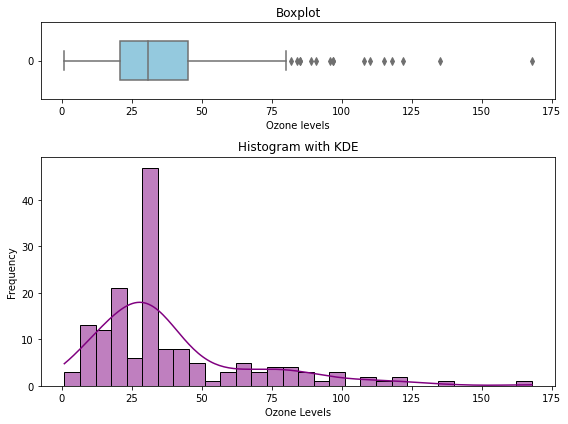

In [81]:
fig,axes = plt.subplots(2,1,figsize = (8,6),gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data = data1['Ozone'],ax = axes[0],color = 'Skyblue',width = 0.5,orient = 'h')
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Ozone levels')
sns.histplot(data1['Ozone'],kde = True,ax = axes[1],color = 'purple',bins = 30)
axes[1].set_title('Histogram with KDE')
axes[1].set_xlabel('Ozone Levels')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Observations
- The ozone column has extreme values beyond 81 as seen from Boxplot
- The same thing is confirmed from below right skewed Histogram

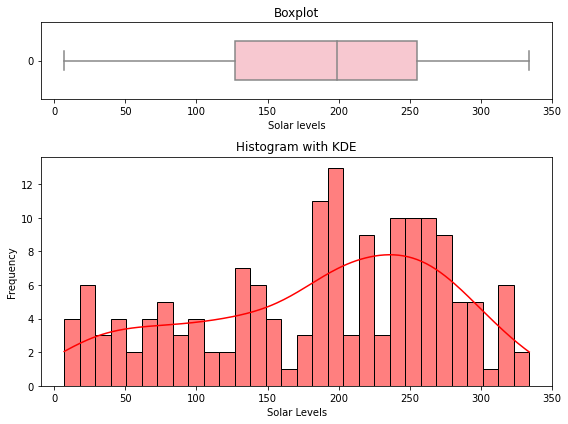

In [697]:
fig,axes = plt.subplots(2,1,figsize = (8,6),gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data = data1['Solar'],ax = axes[0],color = 'pink',width = 0.5,orient = 'h')
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Solar levels')
sns.histplot(data1['Solar'],kde = True,ax = axes[1],color = 'red',bins = 30)
axes[1].set_title('Histogram with KDE')
axes[1].set_xlabel('Solar Levels')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Observations
- There is no outlier 
- The same thing is confirmed from below, it is slightly left skewed Histogram

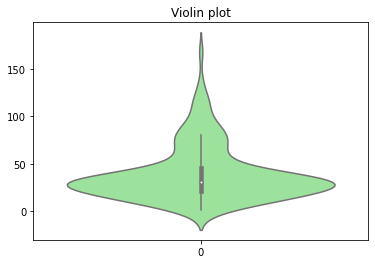

In [703]:
sns.violinplot(data = data1['Ozone'],color = 'Lightgreen')
plt.title('Violin plot')
plt.show()